In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [369]:
hp = pd.read_csv("train.csv")
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [370]:
hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [371]:
hp.shape

(1460, 81)

# Finding the correlation 
- finding correlation of each feature with salePrice
- getting only those columns whose corr > 0.3 and corr != 1
- get extract columns found from above point in dataframe (desiredFeaturesHp).

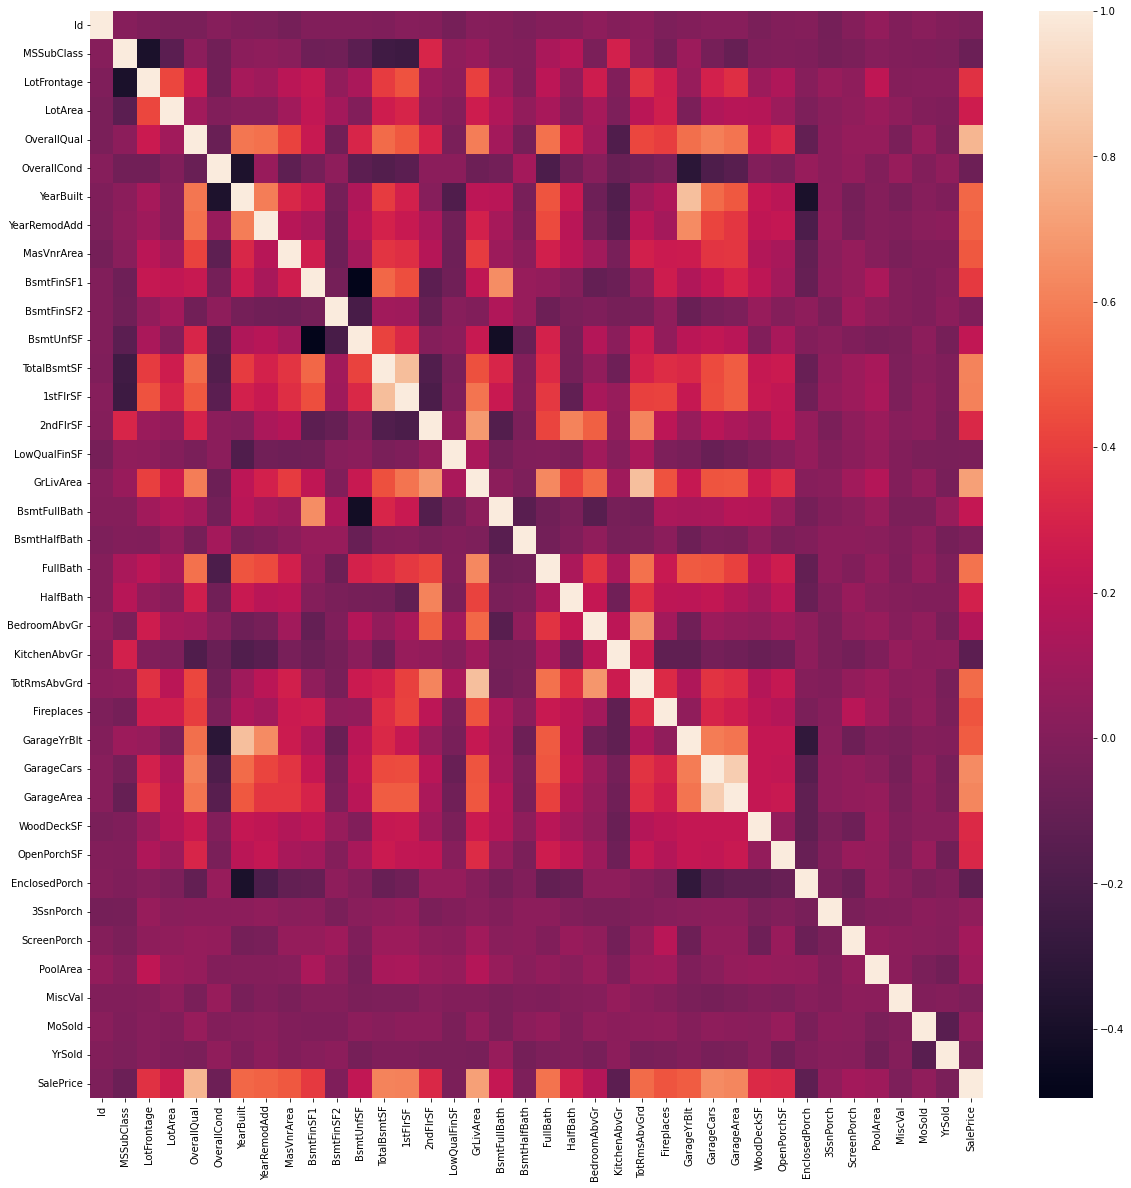

In [372]:
correlations = hp.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations)
plt.show()

In [373]:
corr_series = correlations[:]['SalePrice']
print(corr_series)
req_features_corr = corr_series[(corr_series>0.30)] # not equal to 1 to ignore the salePrice with itself
desired_cols = list(req_features_corr.to_dict().keys())
desiredFeaturesHp = pd.DataFrame(hp, columns=desired_cols)
desiredFeaturesHp.head()

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


# Apply Pre-processing on updated DataFrame

In [374]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [375]:
desiredFeaturesHp.describe()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,6.099315,1971.267808,1984.865753,103.685262,443.639726,1057.429452,1162.626712,346.992466,1515.463699,1.565068,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,180921.195890
std,24.284752,1.382997,30.202904,20.645407,181.066207,456.098091,438.705324,386.587738,436.528436,525.480383,0.550916,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,79442.502883
min,21.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,129975.000000
50%,69.000000,6.000000,1973.000000,1994.000000,0.000000,383.500000,991.500000,1087.000000,0.000000,1464.000000,2.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,163000.000000
75%,80.000000,7.000000,2000.000000,2004.000000,166.000000,712.250000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,214000.000000
max,313.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,755000.000000


In [376]:
desiredFeaturesHp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageYrBlt   1379 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [377]:
desiredFeaturesHp.dropna(axis=0,
                         how='any', 
                         subset=['GarageYrBlt', 'LotFrontage', 'MasVnrArea'],
                         inplace=True)

In [378]:
desiredFeaturesHp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1121 non-null   float64
 1   OverallQual   1121 non-null   int64  
 2   YearBuilt     1121 non-null   int64  
 3   YearRemodAdd  1121 non-null   int64  
 4   MasVnrArea    1121 non-null   float64
 5   BsmtFinSF1    1121 non-null   int64  
 6   TotalBsmtSF   1121 non-null   int64  
 7   1stFlrSF      1121 non-null   int64  
 8   2ndFlrSF      1121 non-null   int64  
 9   GrLivArea     1121 non-null   int64  
 10  FullBath      1121 non-null   int64  
 11  TotRmsAbvGrd  1121 non-null   int64  
 12  Fireplaces    1121 non-null   int64  
 13  GarageYrBlt   1121 non-null   float64
 14  GarageCars    1121 non-null   int64  
 15  GarageArea    1121 non-null   int64  
 16  WoodDeckSF    1121 non-null   int64  
 17  OpenPorchSF   1121 non-null   int64  
 18  SalePrice     1121 non-null 

Break the dataFrame into input and output

In [379]:
inp_features = desiredFeaturesHp.loc[:,"LotFrontage": "OpenPorchSF"]
inp_features.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [380]:
def sale_price_norm(price):
    return price/10e5

desiredFeaturesHp['NormalizedSalePrice'] = desiredFeaturesHp['SalePrice'].apply(sale_price_norm)
output = desiredFeaturesHp['NormalizedSalePrice']
print(desiredFeaturesHp['SalePrice'].max())
print(output.max())

755000
0.755


# visualizing  OverallQual col


In [381]:
np.sort(desiredFeaturesHp['OverallQual'].unique())

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [382]:
desiredFeaturesHp['OverallQual'].value_counts()

5     304
6     271
7     261
8     140
4      74
9      42
10     16
3      11
2       2
Name: OverallQual, dtype: int64

<AxesSubplot:>

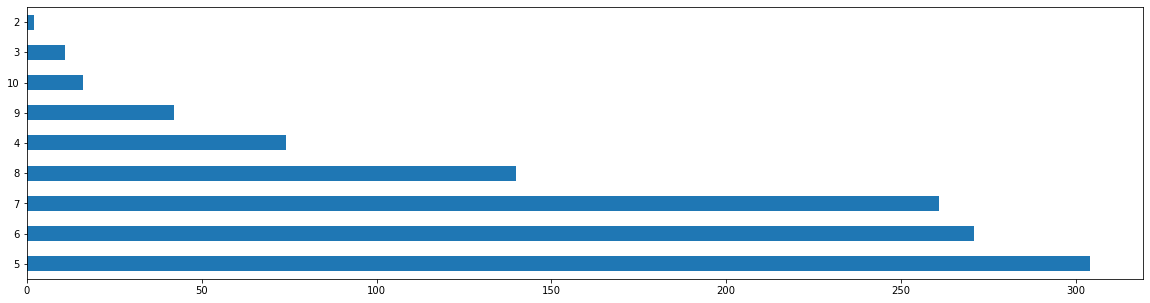

In [383]:
desiredFeaturesHp['OverallQual'].value_counts().plot(kind='barh')

# visualizing  YearBuilt col

In [384]:
np.sort(desiredFeaturesHp['YearBuilt'].unique())

array([1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906,
       1908, 1910, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [385]:
desiredFeaturesHp['YearBuilt'].min()

1880

In [386]:
desiredFeaturesHp['YearBuilt'].value_counts()

2005    64
2006    64
2004    46
2007    46
2003    37
        ..
1904     1
1912     1
1882     1
1917     1
1905     1
Name: YearBuilt, Length: 109, dtype: int64

<AxesSubplot:>

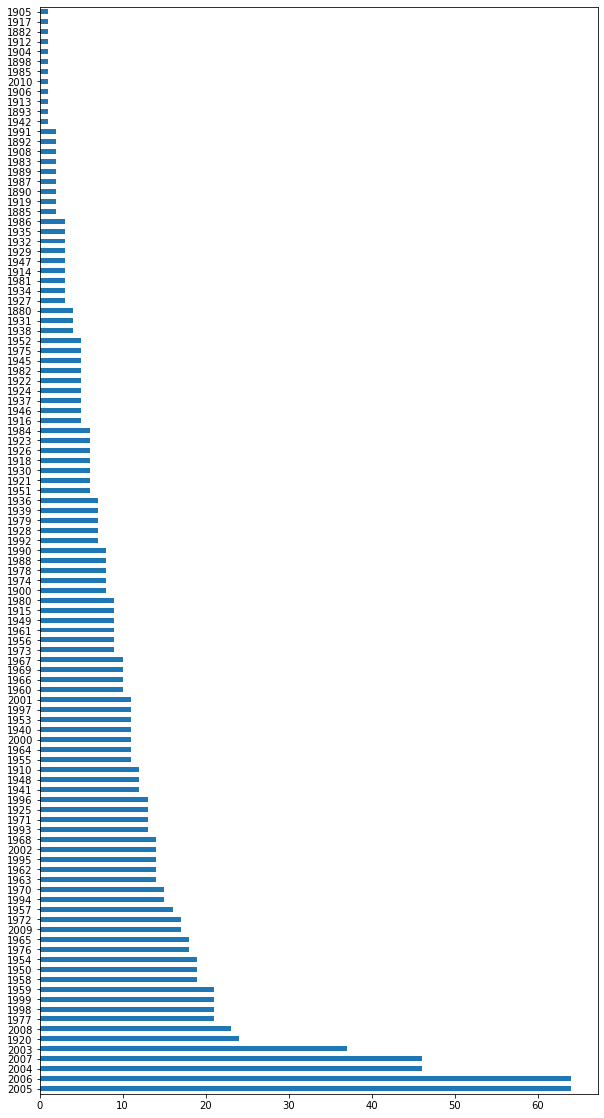

In [387]:
plt.figure(figsize=(10,20))
desiredFeaturesHp['YearBuilt'].value_counts().plot(kind='barh')

In [388]:
print("Most recent house built in ", desiredFeaturesHp['YearBuilt'].max())
print("Most oldest house built in ", desiredFeaturesHp['YearBuilt'].min())

Most recent house built in  2010
Most oldest house built in  1880


In [389]:
"LotFrontage" in desiredFeaturesHp.columns

True

# visualizing  MSZoning col
- None of elemnt is Null
- Mostly houses are Residential Low Density (RL)
- None of Industrial and Agriculture Area include.

In [390]:
# hp['MSZoning'].isnull().sum()

In [391]:
# hp['MSZoning'].unique()

In [392]:
# hp['MSZoning'].value_counts().plot(kind='barh')

# visualizing  LotFrontage col
- None of elemnt is Null
- Mostly houses are Residential Low Density (RL)
- None of Industrial and Agriculture Area include.

In [393]:
hp['LotFrontage'].isnull().sum()

259

In [394]:
hp['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [395]:
hp['LotFrontage'].min()

21.0

In [396]:
hp['LotFrontage'].max()

313.0

In [397]:
hp['LotFrontage'].mean()

70.04995836802665

In [398]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

# visualizing YearRemodAdd col

In [399]:
desiredFeaturesHp['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1950, 1965, 2006, 2007,
       2001, 1967, 2004, 2008, 1997, 1959, 1990, 1966, 1963, 1987, 1955,
       1964, 1972, 1996, 1953, 1973, 1998, 1981, 1968, 1960, 1992, 2009,
       1961, 1999, 1985, 1979, 1977, 1958, 1993, 1991, 1989, 1952, 1975,
       2010, 1986, 1994, 1962, 1971, 1980, 1988, 1954, 1957, 1956, 1982,
       1951, 1984, 1978, 1974, 1983, 1969])

In [400]:
desiredFeaturesHp['YearRemodAdd'].min()

1950

In [401]:
desiredFeaturesHp['YearRemodAdd'].max()

2010

In [402]:
# Those house built in 1880 was remodel in following year
desiredFeaturesHp[desiredFeaturesHp["YearBuilt"] == 1880]['YearRemodAdd']

304     2002
630     1991
747     2003
1132    1950
Name: YearRemodAdd, dtype: int64

<AxesSubplot:>

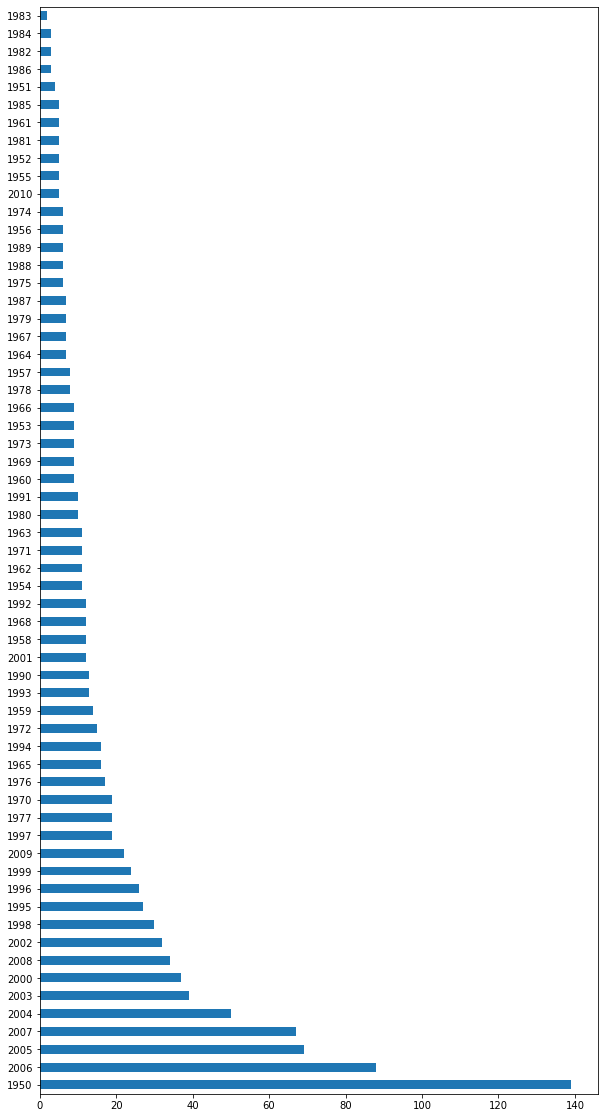

In [403]:
plt.figure(figsize=(10,20))
desiredFeaturesHp['YearRemodAdd'].value_counts().plot(kind='barh')

In [404]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

# visualize MasVnrArea col

In [405]:
desiredFeaturesHp['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.860e+02,
       3.060e+02, 3.800e+02, 2.810e+02, 6.400e+02, 2.000e+02, 2.460e+02,
       1.320e+02, 6.500e+02, 1.010e+02, 4.120e+02, 2.720e+02, 4.560e+02,
       1.031e+03, 1.780e+02, 3.440e+02, 1.670e+02, 1.115e+03, 4.000e+01,
       1.040e+02, 5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 1.830e+02, 4.800e+01, 3.360e+02, 7.680e+02,
       4.800e+02, 2.200e+02, 1.129e+03, 1.350e+02, 2.660e+02, 8.500e+01,
       3.090e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 4.360e+02,
       8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02, 1.120e+02, 4.910e+02,
       2.680e+02, 7.480e+02, 9.800e+01, 2.750e+02, 2.050e+02, 2.620e+02,
       2.600e+02, 6.400e+01, 1.600e+01, 9.220e+02, 1.420e+02, 2.900e+02,
       1.270e+02, 5.060e+02, 2.970e+02, 6.040e+02, 2.540e+02, 3.600e+01,
       1.020e+02, 4.810e+02, 1.080e+02, 3.020e+02, 1.800e+02, 1.720e+02,
       3.990e+02, 2.700e+02, 4.600e+01, 2.100e+02, 

In [406]:
desiredFeaturesHp['MasVnrArea'].describe()

count    1121.000000
mean      108.487957
std       189.500966
min         0.000000
25%         0.000000
50%         0.000000
75%       170.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [407]:
# checking the price of house whose MasVnrArea is greater 
desiredFeaturesHp[desiredFeaturesHp['MasVnrArea']==1600.0]['SalePrice']

297    239000
Name: SalePrice, dtype: int64

In [408]:
"BsmtUnfSF" in desiredFeaturesHp.columns

False

# visualize BsmtFinSF1 col

In [409]:
desiredFeaturesHp['BsmtFinSF1'].unique()

array([ 706,  978,  486,  216,  655,  732, 1369,    0,  851,  906,  998,
        646,  504,  840,  234, 1218, 1277, 1018, 1153, 1213,  731,  643,
        967,  179,  456, 1351,   24,  763,  104, 1810,  384,  490,  649,
        632,  941, 1013,  603, 1880,  565,  320,  462,  336,  448, 1201,
         33,  600,  713, 1046,  648, 1162,  520,  108,  705,  444,  984,
        774,  419, 1470,  570,  300,  512,  567,  445,  405,  668,  821,
       1300,  507,  679, 1332,  209,  716, 1400,  222,   57, 1016,  370,
       1288,  639,  495,  288, 1398,  477,  831, 1904,  352, 1086,  297,
        560,  390,  566, 1126, 1036, 1088,  641,  617,  312,  787,   36,
        822,  360,  946,   16,  550,  524,   56,  321,  842,  689,  182,
        358,   94, 1078,  929, 1573,  270,  922,  503, 1334,  361,  672,
        506,  588,  714,  378,  403,  226,  620,  546,  120,  392,  421,
        905,  904,  430,  292, 1285,  819,  420,  841,  281,  894, 1464,
        700, 1274,  680, 1236,  425,  692,  987,  9

In [410]:
desiredFeaturesHp['BsmtFinSF1'].describe()

count    1121.000000
mean      438.399643
std       468.385038
min         0.000000
25%         0.000000
50%       374.000000
75%       702.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [411]:
correlations['BsmtFinSF1']['SalePrice']

0.3864198062421535

In [412]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

# visualize TotalBsmtSF col

In [413]:
desiredFeaturesHp['TotalBsmtSF'].unique()

array([ 856, 1262,  920,  756, 1145,  796, 1686,  952,  991, 1040, 1175,
       1494,  832,    0, 1114, 1029, 1158,  637, 1777, 1566,  900, 1704,
       1484,  520,  649, 1234, 1398, 1561, 1117, 1097, 1297, 1057, 1088,
       1350, 1150, 1752, 1434, 1656,  955,  816, 1842,  384, 1425,  970,
        860, 1410,  780,  530, 1370,  576, 1143, 1453,  747, 1304, 2223,
        845, 1086,  840,  462,  672,  440,  896, 1237, 1563, 1065, 1288,
        684,  612, 1235,  876, 1214,  824, 1588,  960,  458,  741, 1226,
       1053,  641,  789, 1844,  994, 1264, 1028,  729, 1125, 1673,  728,
        732, 1080, 1199, 1362,  660, 1008,  924, 1063, 1461, 1907, 1004,
        928, 1734,  910, 1490, 1728,  715,  969, 1710, 1200,  774, 1392,
       1572, 1541, 1149, 1582, 1064, 1606, 1202, 1151, 2216,  968,  793,
        504, 1107, 1593,  853, 1431,  864,  855, 1726, 1360, 1713, 1121,
       1196,  617,  720, 1424, 1140, 1092, 1212,  990, 1070, 1436,  686,
       1248, 1498,  713, 2392,  630, 1203,  483,  9

In [414]:
desiredFeaturesHp['TotalBsmtSF'].describe()

count    1121.000000
mean     1077.115076
std       445.656500
min         0.000000
25%       803.000000
50%      1008.000000
75%      1324.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [415]:
correlations['TotalBsmtSF']['SalePrice']

0.6135805515591943

In [416]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

# visualize 1stFlrSF and 2ndFlrSF col

In [417]:
desiredFeaturesHp['1stFlrSF'].unique()

array([ 856, 1262,  920,  961, 1145,  796, 1694, 1022, 1077, 1040, 1182,
       1494,  854, 1296, 1114, 1339, 1158, 1108, 1795, 1060, 1600,  900,
       1704,  520,  649, 1234, 1700, 1561, 1132, 1097, 1297, 1057, 1324,
       1328, 1150, 1752, 1518, 1656,  955,  816, 1842, 1360, 1425,  983,
        860, 1426,  780,  581, 1370,  902, 1143, 1479,  747, 1304, 2223,
        845,  885, 1086,  840,  526, 1072,  682, 1337, 1563, 1065, 1301,
        684,  612, 1235,  964, 1260,  905, 1588,  960,  835,  977, 1535,
       1226, 1053, 1047,  789, 1844, 1216, 1282, 1436,  729, 1125, 1699,
        728,  772, 1080, 1199, 1586,  660, 1327, 1721, 1682, 1959, 1004,
        928, 1734,  910, 1501, 1728,  970,  875,  969, 1710, 1200,  774,
        991, 1392, 1572, 1541, 1149, 1610, 1064, 1362, 1651, 2158, 1164,
       2234,  968,  901, 1340,  936,  808, 1224, 1593, 1549, 1431,  864,
        855, 1726, 1713, 1121, 1279,  865,  720, 1442, 1696, 1092, 1212,
        932,  990, 1236,  810, 1248, 1498,  811, 23

In [418]:
desiredFeaturesHp['2ndFlrSF'].unique()

array([ 854,    0,  866,  756, 1053,  566,  752, 1142, 1218,  668, 1320,
        631,  860, 1519,  530,  808, 1330,  983,  833,  765,  462,  213,
        548,  960, 1116,  876,  612, 1031,  881,  755,  939,  639, 1414,
        884,  729, 1523,  728,  351,  688,  941,  848,  836,  475,  739,
       1194,  956, 1070, 1096,  467,  551,  880,  703,  896,  901,  720,
        316, 1518,  704, 1178,  601, 1360,  445,  564,  920,  518,  741,
        672, 1306,  504, 1304,  689,  591, 1020,  828,  842, 1286,  864,
        829, 1092,  709,  844, 1106,  596,  807,  625,  649,  698,  840,
        568,  648,  975,  702, 1242, 1818, 1121,  325,  809,  716, 1200,
        871, 1274, 1347, 1332, 1177, 1080,  695,  915,  576,  605,  862,
        495,  403,  838, 1427,  468, 1081,  886,  793,  665,  858,  590,
        406, 1157,  299,  936,  438, 1098, 1101, 1028, 1017, 1254,  378,
       1160,  682,  600,  678,  834,  384,  512,  804, 1103,  560,  811,
        878,  574,  910,  620,  687,  546,  902, 10

In [419]:
desiredFeaturesHp['1stFlrSF'].describe()

count    1121.000000
mean     1173.584300
std       386.174253
min       438.000000
25%       894.000000
50%      1097.000000
75%      1411.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [420]:
desiredFeaturesHp['2ndFlrSF'].describe()

count    1121.000000
mean      353.258698
std       438.561788
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

In [421]:
correlations['1stFlrSF']['SalePrice']

0.6058521846919153

In [422]:
correlations['2ndFlrSF']['SalePrice']

0.31933380283206736

In [423]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

# visualize GrLivArea col

In [424]:
desiredFeaturesHp['GrLivArea'].unique()

array([1710, 1262, 1786, 1717, 2198, 1362, 1694, 1774, 1077, 1040, 2324,
       1494,  854, 1296, 1114, 1339, 2376, 1108, 1795, 1060, 1600,  900,
       1704,  520, 1317, 1234, 1700, 1561, 2452, 1097, 1297, 1057, 1324,
       1328, 1150, 1752, 2149, 1656,  955, 1176,  816, 1842, 1360, 1425,
       1739, 1720, 2945,  780, 1158, 1111, 1370, 2473, 1479,  747, 2287,
       2223,  845, 1718, 1086, 1605,  988, 1285, 1230, 2142, 1337, 1563,
       1065, 2417, 1560, 1224, 1235,  964, 2291, 1588,  960,  835, 1732,
       1535, 1226, 1992, 1047,  789, 1844, 1855, 2696, 2320, 1458, 1125,
       3222, 1456, 1123, 1080, 1199, 1586, 1348, 1053, 2157, 1327, 1721,
       1682, 1959, 1852, 1764, 1734, 1385, 1501, 1728, 1709,  875,  969,
       1200, 1968, 1947, 2462, 2668, 1541, 1616, 2161, 1767, 1651, 2158,
       2060, 2234,  968, 1802, 1340, 2082, 1252, 3608, 1593, 2727, 1431,
        864, 1726, 3112, 1713, 1121, 1279, 1310, 1284, 1442, 1696, 1092,
       1212,  990, 1236, 1436, 1248, 1498, 1552, 23

In [425]:
desiredFeaturesHp['GrLivArea'].describe()

count    1121.000000
mean     1531.411240
std       523.723899
min       438.000000
25%      1155.000000
50%      1479.000000
75%      1776.000000
max      5642.000000
Name: GrLivArea, dtype: float64

In [426]:
desiredFeaturesHp['GrLivArea'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1121 entries, 0 to 1459
Series name: GrLivArea
Non-Null Count  Dtype
--------------  -----
1121 non-null   int64
dtypes: int64(1)
memory usage: 17.5 KB


In [427]:
correlations['GrLivArea']['SalePrice']

0.7086244776126515

In [428]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

# visualize FullBath, Fireplaces col

In [429]:
print(desiredFeaturesHp['FullBath'].unique())
print(desiredFeaturesHp['Fireplaces'].unique())

[2 1 3 0]
[0 1 2 3]


In [430]:
print(desiredFeaturesHp['FullBath'].describe())
print("*"*30)
print(desiredFeaturesHp['Fireplaces'].describe())
# print(desiredFeaturesHp['FullBath'].describe())


count    1121.000000
mean        1.580731
std         0.550117
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
******************************
count    1121.000000
mean        0.603925
std         0.632556
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


In [431]:
print(correlations['HalfBath']['SalePrice'])
print(correlations['Fireplaces']['SalePrice'])

0.28410767559478256
0.46692883675152763


In [432]:
correlations['FullBath']['SalePrice']

0.5606637627484453

<AxesSubplot:>

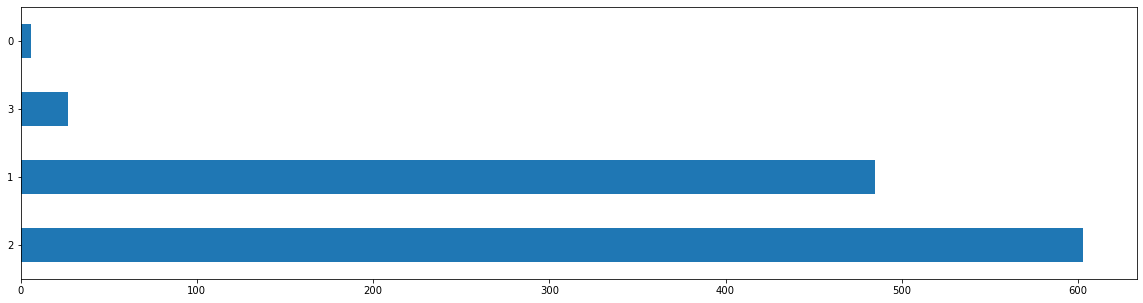

In [433]:
desiredFeaturesHp['FullBath'].value_counts().plot(kind='barh')

<AxesSubplot:>

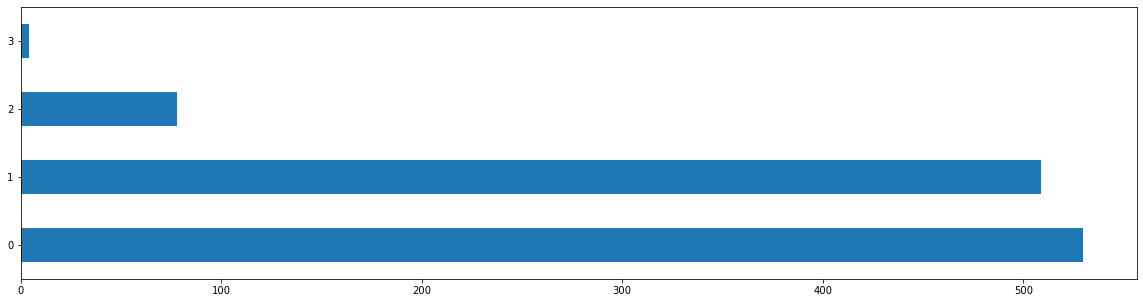

In [434]:
desiredFeaturesHp['Fireplaces'].value_counts().plot(kind='barh')

In [435]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

# visualize GarageYrBlt, GarageCars, GarageArea col

In [436]:

print(desiredFeaturesHp['GarageYrBlt'].unique())
print("*"*70)
print(desiredFeaturesHp['GarageCars'].unique())
print("*"*70)
print(desiredFeaturesHp['GarageArea'].unique())

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1931. 1939. 1965. 2005. 2006.
 1991. 1967. 1958. 1930. 2002. 2007. 2008. 1957. 1920. 1959. 1995. 1954.
 1953. 1966. 1985. 1963. 1981. 1962. 1964. 1999. 1973. 1935. 1990. 1945.
 1987. 1989. 1915. 1948. 1968. 1974. 2009. 1950. 1961. 1921. 1900. 1997.
 1979. 1977. 1970. 1975. 1923. 1926. 1960. 1986. 1988. 1916. 1932. 1918.
 1980. 1924. 1996. 1940. 1972. 1971. 1949. 1910. 1956. 1978. 1982. 1951.
 1992. 1984. 1925. 1983. 1955. 1941. 2010. 1936. 1927. 1947. 1994. 1937.
 1942. 1938. 1952. 1928. 1922. 1934. 1969. 1906. 1914. 1946. 1908. 1929.
 1933.]
**********************************************************************
[2 3 1 4]
**********************************************************************
[ 548  460  608  642  836  480  636  468  205  384  736  840  576  516
  294  853  280  534  572  890  772  319  240  250  484  447  556  691
  672  498  246  440  308  300  670  826  386  528  894  565  641  352
  288  852  558  220  667  360  427  490  3

In [437]:
print(desiredFeaturesHp['GarageYrBlt'].describe())
print("*"*30)
print(desiredFeaturesHp['GarageCars'].describe())
print("*"*30)
print(desiredFeaturesHp['GarageArea'].describe())

count    1121.000000
mean     1978.399643
std        25.822833
min      1900.000000
25%      1959.000000
50%      1981.000000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
******************************
count    1121.000000
mean        1.878680
std         0.654313
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
******************************
count    1121.000000
mean      502.955397
std       191.243043
min       160.000000
25%       360.000000
50%       484.000000
75%       600.000000
max      1418.000000
Name: GarageArea, dtype: float64


In [438]:
# 'GarageYrBlt', 'GarageCars',
#        'GarageArea',
# print(desiredFeaturesHp['FullBath'].describe())


print(correlations['GarageYrBlt']['SalePrice'])
print(correlations['GarageCars']['SalePrice'])
print(correlations['GarageArea']['SalePrice'])



0.4863616774878596
0.6404091972583519
0.6234314389183622


<AxesSubplot:>

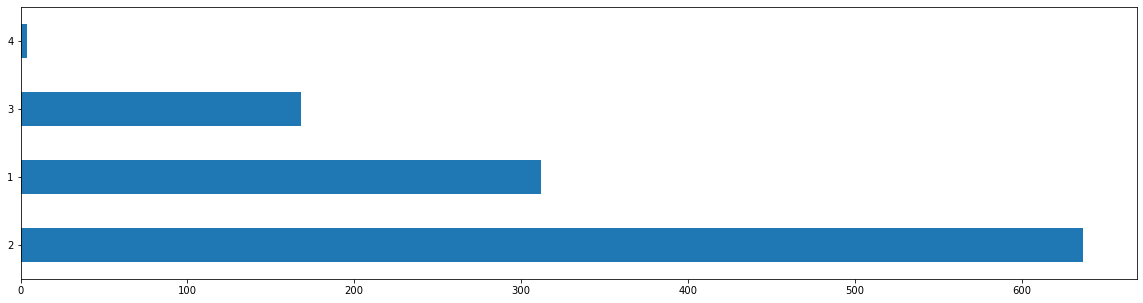

In [439]:
desiredFeaturesHp['GarageCars'].value_counts().plot(kind='barh')

In [440]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

In [441]:
desiredFeaturesHp['WoodDeckSF'].unique()

array([  0, 298, 192,  40, 255,  90, 147, 160,  48, 240, 171, 100, 222,
       288,  49, 203, 113, 392, 196, 168, 112, 106, 857, 115, 120,  12,
       144, 300,  74, 127, 158, 140, 182, 224,  80, 367, 188, 105,  98,
       276, 239, 400, 178, 210, 441, 116, 280, 104,  87, 132, 238, 139,
       108, 351, 209, 216, 248, 143, 365, 197, 123, 138, 333, 250, 292,
        95, 262,  81, 289, 124, 172, 110, 208, 468, 256, 302, 340, 184,
       201, 142, 122, 135, 495, 536,  64, 353,  66, 159, 146, 296, 125,
        44, 215, 264, 200,  96, 414, 519, 206, 260, 324, 156, 220,  38,
       261, 126, 270,  78, 169, 320, 268,  72, 349,  35, 326, 382, 180,
       161, 179, 103, 148, 335, 176, 390, 312, 185, 269, 195,  57, 236,
       517, 426,  28, 316, 322, 257, 416, 344,  68, 327, 237, 165, 187,
       181,  92, 228, 245, 503, 315, 241, 403,  36,  52, 265, 207, 290,
       278,  70, 418, 234, 486,  26,  97, 272, 121, 243, 154, 384,  86,
       194, 421, 150, 509, 394, 252, 136, 170, 474, 214, 199, 16

In [442]:
desiredFeaturesHp['WoodDeckSF'].describe()

count    1121.000000
mean       92.610169
std       121.868623
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64

In [443]:
correlations['WoodDeckSF']['SalePrice']

0.32441344456812926

In [444]:
desiredFeaturesHp.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'NormalizedSalePrice'],
      dtype='object')

In [445]:
desiredFeaturesHp["OpenPorchSF"].unique()

array([ 61,   0,  42,  35,  84,  30,  57,   4,  21,  33, 112, 102, 154,
       159, 110,  56,  32,  50, 258,  54,  38,  47,  64,  52, 138, 104,
        82,  43, 146,  72,  70,  49,  11, 151,  29,  94, 101, 199,  99,
       234, 162,  46,  36,  45, 122, 184,  24,  63, 108,  80,  66,  96,
       106,  40,  75, 136, 132, 120,  48,  62,  20, 228,  60, 238, 260,
        74,  16,  26,  83,  34,  22,  98, 172, 208, 105, 114, 140, 168,
        28,  39,  68, 148,  12,  25,  51, 150, 117,  10,  81,  44, 175,
       195,  27,  90, 128,  59, 214, 121,  53, 134, 130, 192, 123, 187,
        85, 133, 176, 113, 125, 100, 285,  88, 406, 144, 155,  73, 182,
        55, 502, 274, 158, 243, 111, 124,  76, 267,  87,  78, 288,  23,
       152, 341, 116, 174, 247,  18, 170, 312, 156, 166, 129, 418, 240,
        77, 364, 188,  65, 207,  67,  69, 131, 191, 252, 135,  95, 169,
        93, 244, 185,  92, 263,  17,  58, 287, 292, 241, 547, 211,  91,
        86, 262, 210, 141,  15, 160,  41])

In [446]:
desiredFeaturesHp["OpenPorchSF"].describe()

count    1121.000000
mean       46.130241
std        64.390029
min         0.000000
25%         0.000000
50%        27.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64

In [447]:
desiredFeaturesHp['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3])

<AxesSubplot:>

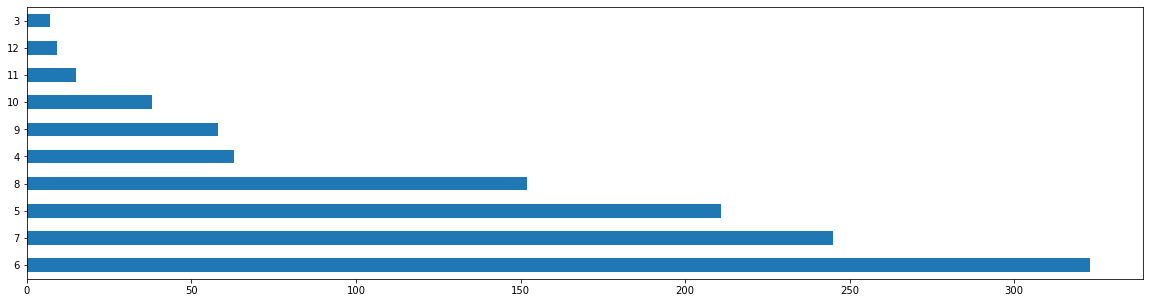

In [448]:
desiredFeaturesHp['TotRmsAbvGrd'].value_counts().plot(kind='barh')

# Break the dataFrame into input and output

In [449]:
X = desiredFeaturesHp.loc[:,"LotFrontage": "OpenPorchSF"]
y = desiredFeaturesHp['NormalizedSalePrice']

In [450]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1121 non-null   float64
 1   OverallQual   1121 non-null   int64  
 2   YearBuilt     1121 non-null   int64  
 3   YearRemodAdd  1121 non-null   int64  
 4   MasVnrArea    1121 non-null   float64
 5   BsmtFinSF1    1121 non-null   int64  
 6   TotalBsmtSF   1121 non-null   int64  
 7   1stFlrSF      1121 non-null   int64  
 8   2ndFlrSF      1121 non-null   int64  
 9   GrLivArea     1121 non-null   int64  
 10  FullBath      1121 non-null   int64  
 11  TotRmsAbvGrd  1121 non-null   int64  
 12  Fireplaces    1121 non-null   int64  
 13  GarageYrBlt   1121 non-null   float64
 14  GarageCars    1121 non-null   int64  
 15  GarageArea    1121 non-null   int64  
 16  WoodDeckSF    1121 non-null   int64  
 17  OpenPorchSF   1121 non-null   int64  
dtypes: float64(3), int64(15)
mem

In [451]:
y.head()

0    0.2085
1    0.1815
2    0.2235
3    0.1400
4    0.2500
Name: NormalizedSalePrice, dtype: float64

In [452]:
# x_train, y_train = X, y                                                 

In [453]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1121 non-null   float64
 1   OverallQual   1121 non-null   int64  
 2   YearBuilt     1121 non-null   int64  
 3   YearRemodAdd  1121 non-null   int64  
 4   MasVnrArea    1121 non-null   float64
 5   BsmtFinSF1    1121 non-null   int64  
 6   TotalBsmtSF   1121 non-null   int64  
 7   1stFlrSF      1121 non-null   int64  
 8   2ndFlrSF      1121 non-null   int64  
 9   GrLivArea     1121 non-null   int64  
 10  FullBath      1121 non-null   int64  
 11  TotRmsAbvGrd  1121 non-null   int64  
 12  Fireplaces    1121 non-null   int64  
 13  GarageYrBlt   1121 non-null   float64
 14  GarageCars    1121 non-null   int64  
 15  GarageArea    1121 non-null   int64  
 16  WoodDeckSF    1121 non-null   int64  
 17  OpenPorchSF   1121 non-null   int64  
dtypes: float64(3), int64(15)
mem

In [483]:
# reading the test csv file
test_df = pd.read_csv("test.csv")
test_features_in = pd.DataFrame(test_df, columns=desired_cols[:-1]).values
test_features_in

array([[  80.,    5., 1961., ...,  730.,  140.,    0.],
       [  81.,    6., 1958., ...,  312.,  393.,   36.],
       [  74.,    5., 1997., ...,  482.,  212.,   34.],
       ...,
       [ 160.,    5., 1960., ...,  576.,  474.,    0.],
       [  62.,    5., 1992., ...,    0.,   80.,   32.],
       [  74.,    7., 1993., ...,  650.,  190.,   48.]])

# train test split

In [486]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.10,
                                                    random_state=42,
                                                    shuffle=True)


In [487]:
x_train.describe()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,70.776786,6.197421,1971.496032,1985.432540,105.885913,439.429563,1074.915675,1168.933532,356.525794,1529.688492,1.570437,6.584325,0.600198,1977.847222,1.872024,501.948413,92.909722,47.029762
std,24.483397,1.395735,31.126324,21.093668,185.811925,471.790781,446.772857,387.916043,436.128086,522.896944,0.550344,1.592819,0.636431,25.978420,0.662884,194.485810,122.857749,65.976653
min,21.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,438.000000,0.000000,438.000000,0.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000
25%,60.000000,5.000000,1952.000000,1966.000000,0.000000,0.000000,802.750000,888.750000,0.000000,1149.500000,1.000000,6.000000,0.000000,1959.000000,1.000000,359.500000,0.000000,0.000000
50%,70.000000,6.000000,1973.000000,1995.000000,0.000000,370.500000,997.500000,1087.000000,0.000000,1484.000000,2.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000
75%,80.000000,7.000000,2003.000000,2004.000000,167.250000,699.250000,1316.500000,1408.000000,728.000000,1776.750000,2.000000,7.000000,1.000000,2003.000000,2.000000,600.000000,169.500000,70.000000
max,313.000000,10.000000,2009.000000,2010.000000,1600.000000,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000


# Data Normalization

In [488]:
from sklearn import preprocessing
X_train = preprocessing.normalize(x_train)
X_test = preprocessing.normalize(x_test)

In [489]:
X_train.shape

(1008, 18)

In [490]:
X_train

array([[0.01616887, 0.00107792, 0.52521871, ..., 0.11318207, 0.        ,
        0.        ],
       [0.00934942, 0.001522  , 0.43572651, ..., 0.11958562, 0.02174284,
        0.01043656],
       [0.00864409, 0.0018523 , 0.41285802, ..., 0.15600517, 0.04136813,
        0.00802665],
       ...,
       [0.00781149, 0.00182268, 0.52206808, ..., 0.12498388, 0.        ,
        0.04322359],
       [0.01735205, 0.00149956, 0.42716045, ..., 0.11246702, 0.03663212,
        0.02827742],
       [0.02404625, 0.0013359 , 0.5220709 , ..., 0.08710088, 0.        ,
        0.        ]])

In [491]:
X_test

array([[0.00896362, 0.00153662, 0.51348764, ..., 0.13445437, 0.        ,
        0.01126856],
       [0.01821521, 0.00121435, 0.47578134, ..., 0.15155056, 0.        ,
        0.        ],
       [0.02168276, 0.0012046 , 0.47051579, ..., 0.09034481, 0.        ,
        0.        ],
       ...,
       [0.01618052, 0.0014521 , 0.41592221, ..., 0.13691205, 0.0331908 ,
        0.00497862],
       [0.0177938 , 0.0016832 , 0.48043254, ..., 0.10267502, 0.        ,
        0.02260293],
       [0.01537511, 0.00168165, 0.48215372, ..., 0.15086823, 0.02522478,
        0.01297275]])

In [492]:
Y_train = y_train.values
Y_train

array([0.09    , 0.24    , 0.3775  , ..., 0.144152, 0.271   , 0.117   ])

In [495]:
Y_test = y_test.values
Y_test

array([0.14    , 0.15075 , 0.157   , 0.138   , 0.144   , 0.227   ,
       0.145   , 0.16    , 0.184   , 0.145   , 0.145   , 0.38397 ,
       0.2225  , 0.16    , 0.133   , 0.123   , 0.185   , 0.1805  ,
       0.191   , 0.165   , 0.204   , 0.122   , 0.0854  , 0.225   ,
       0.138   , 0.108   , 0.755   , 0.163   , 0.155   , 0.156   ,
       0.193879, 0.19    , 0.176   , 0.284   , 0.315   , 0.19    ,
       0.200141, 0.1595  , 0.1975  , 0.0795  , 0.1947  , 0.3289  ,
       0.145   , 0.1285  , 0.285   , 0.232   , 0.1385  , 0.191   ,
       0.1539  , 0.11    , 0.187   , 0.392   , 0.151   , 0.1775  ,
       0.2025  , 0.201   , 0.133   , 0.174   , 0.1885  , 0.086   ,
       0.17954 , 0.13    , 0.14    , 0.0945  , 0.3125  , 0.139   ,
       0.1225  , 0.143   , 0.145   , 0.538   , 0.25    , 0.196   ,
       0.115   , 0.394432, 0.153   , 0.124   , 0.175   , 0.336   ,
       0.1445  , 0.067   , 0.263   , 0.149   , 0.143   , 0.186   ,
       0.196   , 0.2455  , 0.157   , 0.193   , 0.2095  , 0.227

# Applying regression models

### Applying linear Regression

In [496]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_train, Y_train)

0.7754573572041268

In [497]:
X_test.reshape(-1,1)

array([[0.00896362],
       [0.00153662],
       [0.51348764],
       ...,
       [0.15086823],
       [0.02522478],
       [0.01297275]])

In [498]:
y_pred = reg.predict(X_test)

In [268]:
Y_test = y_test.values
Y_test

array([0.14    , 0.15075 , 0.157   , 0.138   , 0.144   , 0.227   ,
       0.145   , 0.16    , 0.184   , 0.145   , 0.145   , 0.38397 ,
       0.2225  , 0.16    , 0.133   , 0.123   , 0.185   , 0.1805  ,
       0.191   , 0.165   , 0.204   , 0.122   , 0.0854  , 0.225   ,
       0.138   , 0.108   , 0.755   , 0.163   , 0.155   , 0.156   ,
       0.193879, 0.19    , 0.176   , 0.284   , 0.315   , 0.19    ,
       0.200141, 0.1595  , 0.1975  , 0.0795  , 0.1947  , 0.3289  ,
       0.145   , 0.1285  , 0.285   , 0.232   , 0.1385  , 0.191   ,
       0.1539  , 0.11    , 0.187   , 0.392   , 0.151   , 0.1775  ,
       0.2025  , 0.201   , 0.133   , 0.174   , 0.1885  , 0.086   ,
       0.17954 , 0.13    , 0.14    , 0.0945  , 0.3125  , 0.139   ,
       0.1225  , 0.143   , 0.145   , 0.538   , 0.25    , 0.196   ,
       0.115   , 0.394432, 0.153   , 0.124   , 0.175   , 0.336   ,
       0.1445  , 0.067   , 0.263   , 0.149   , 0.143   , 0.186   ,
       0.196   , 0.2455  , 0.157   , 0.193   , 0.2095  , 0.227

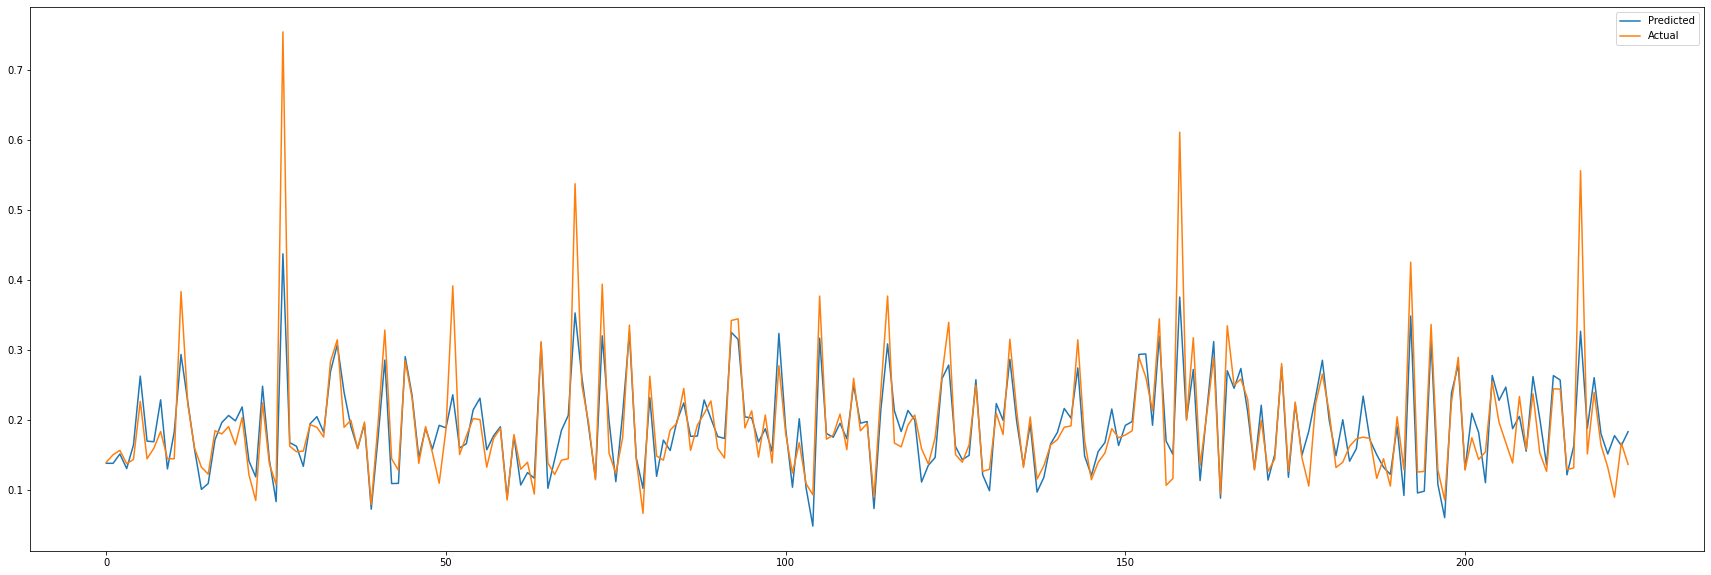

In [269]:
plt.figure(figsize=(30,10))
plt.plot(y_pred)
plt.plot(Y_test)
plt.legend(["Predicted", "Actual"])
print("\n"*2)

### Applying SVR 

In [462]:
from sklearn.svm import SVR

In [463]:
reg = SVR(kernel='rbf', 
          C=1.0,
          epsilon=0.2,
         gamma='auto')

reg.fit(X_train, Y_train)

SVR(epsilon=0.2, gamma='auto')

In [464]:
reg.score(X_train, Y_train)

-1.1529499074240004

### Applying XGBOOST

[15:39:27] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.019753



***************Prediction Results***************
Predicted outcome:  [0.14166184 0.16026425 0.15623347 0.14554565 0.1343118 ]
True outcome:  1297    0.14000
132     0.15075
300     0.15700
1307    0.13800
778     0.14400
Name: NormalizedSalePrice, dtype: float64



***************Plts***************





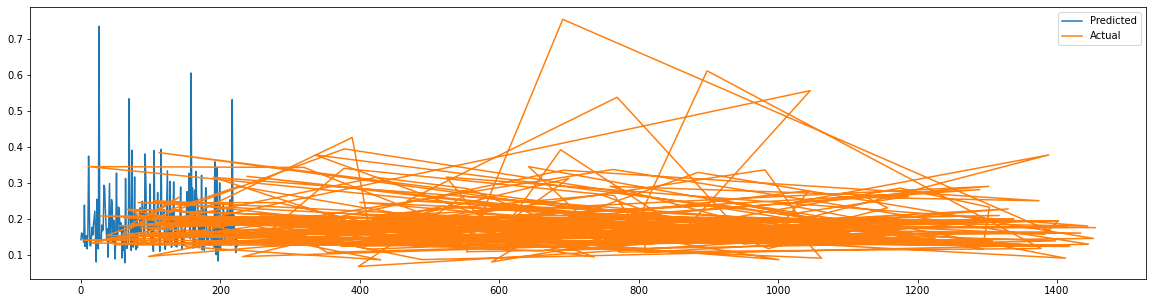

In [465]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.3,
                          learning_rate = 1,
                          max_depth = 5, 
                          n_estimators = 10)

xg_reg.fit(X_train,Y_train)
preds = xg_reg.predict(X_test)
# y_test = y_test.values.reshape(-1)

# preds = preds*2
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

print("\n"*2)
print("***************Prediction Results***************")
print("Predicted outcome: ", preds[:5])
print("True outcome: ", y_test[:5])
print("\n"*2)
print("***************Plts***************")
plt.rcParams["figure.figsize"] = (20,5)

plt.plot(preds)
plt.plot(y_test)

plt.legend(["Predicted", "Actual"])
print("\n"*2)


[0.13362524 0.15101676 0.134876   0.15453175 0.17053442]
[0.14    0.15075 0.157   0.138   0.144  ]


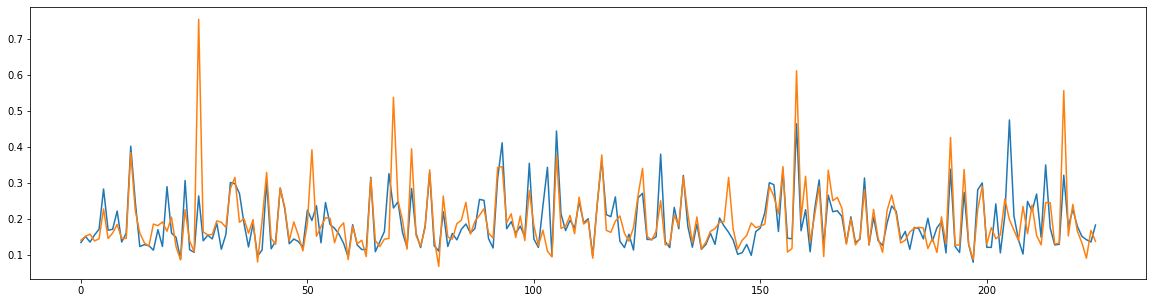

In [281]:
print(preds[:5])
print(Y_test[:5])
plt.plot(preds)
plt.plot(Y_test)
plt.show()

### Applying Decision Tree

In [466]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressorModel = DecisionTreeRegressor(max_depth = 4, 
                                                   random_state=33)
DecisionTreeRegressorModel.fit(X_train, Y_train)
DecisionTreeRegressorModel.score(X_train, Y_train)

0.8500108743531251

error:  0.15204793904625863
error:  0.025342686603283763


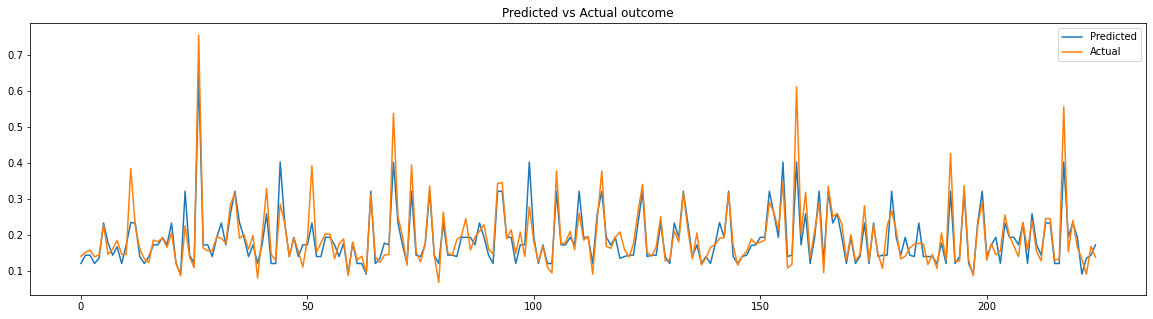

In [352]:
plt.figure(figsize=(20,5))
y_pred_dec = DecisionTreeRegressorModel.predict(X_test)
print("error: ", mean_squared_error(y_pred_dec, Y_test)*100)
print("error: ", mean_absolute_error(y_pred_dec, Y_test))
plt.plot(y_pred_dec)
plt.plot(Y_test)
plt.title("Predicted vs Actual outcome")
plt.legend(["Predicted", "Actual"])


In [290]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
errors = mean_squared_error(preds, Y_test)
errors

0.004394630282955134

In [291]:
mean_absolute_error(preds, Y_test)

0.037934886377383334

### Apply ANN

In [467]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [468]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=10, input_dim=18, 
                kernel_initializer='normal', 
                activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=8, 
                kernel_initializer='normal', 
                activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error',
              optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, Y_train, 
          batch_size = 16, 
          epochs = 40, 
          validation_data=(X_test, Y_test),
          verbose=2)

Epoch 1/40
71/71 - 1s - loss: 0.0229 - val_loss: 0.0078 - 644ms/epoch - 9ms/step
Epoch 2/40
71/71 - 0s - loss: 0.0067 - val_loss: 0.0075 - 163ms/epoch - 2ms/step
Epoch 3/40
71/71 - 0s - loss: 0.0063 - val_loss: 0.0070 - 219ms/epoch - 3ms/step
Epoch 4/40
71/71 - 0s - loss: 0.0058 - val_loss: 0.0064 - 219ms/epoch - 3ms/step
Epoch 5/40
71/71 - 0s - loss: 0.0052 - val_loss: 0.0057 - 202ms/epoch - 3ms/step
Epoch 6/40
71/71 - 0s - loss: 0.0044 - val_loss: 0.0047 - 197ms/epoch - 3ms/step
Epoch 7/40
71/71 - 0s - loss: 0.0035 - val_loss: 0.0038 - 201ms/epoch - 3ms/step
Epoch 8/40
71/71 - 0s - loss: 0.0028 - val_loss: 0.0031 - 195ms/epoch - 3ms/step
Epoch 9/40
71/71 - 0s - loss: 0.0025 - val_loss: 0.0028 - 229ms/epoch - 3ms/step
Epoch 10/40
71/71 - 0s - loss: 0.0023 - val_loss: 0.0027 - 226ms/epoch - 3ms/step
Epoch 11/40
71/71 - 0s - loss: 0.0022 - val_loss: 0.0025 - 232ms/epoch - 3ms/step
Epoch 12/40
71/71 - 0s - loss: 0.0022 - val_loss: 0.0024 - 279ms/epoch - 4ms/step
Epoch 13/40
71/71 - 0s - 

dict_keys(['loss', 'val_loss'])


Text(0.5, 1.0, 'Training loss Vs Validation Loss')

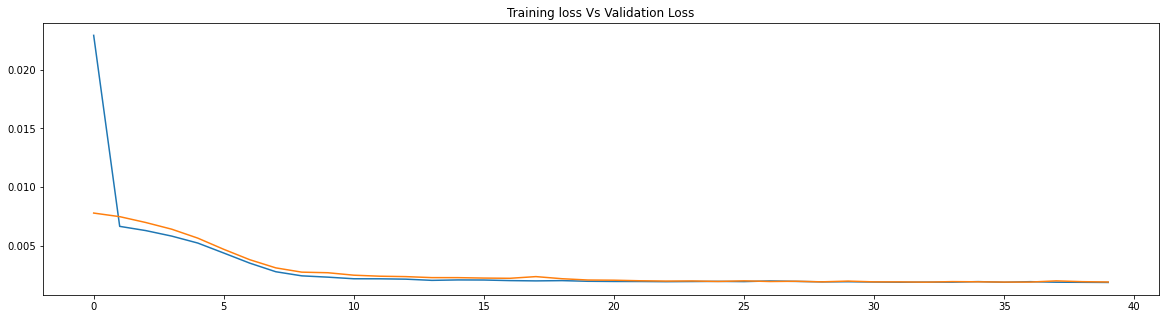

In [469]:
# X_train[0].shape
print(model.history.history.keys())
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Training loss Vs Validation Loss")

In [313]:
model.history.history

{'loss': [0.03264974430203438,
  0.014462250284850597,
  0.006662008818238974,
  0.0061972071416676044,
  0.006051365751773119,
  0.005868691019713879,
  0.005685389507561922,
  0.005433436017483473,
  0.0052043115720152855,
  0.004829303827136755,
  0.0044203209690749645,
  0.003988630138337612,
  0.0035312180407345295,
  0.0030924975872039795,
  0.0027350906748324633,
  0.0024715042673051357,
  0.0023058722727000713,
  0.002251631813123822,
  0.002163428347557783,
  0.0021348248701542616,
  0.0021214012522250414,
  0.0020722479093819857,
  0.0020654737018048763,
  0.002039691898971796,
  0.0020181811414659023,
  0.002012876095250249,
  0.0019934005104005337,
  0.0019813671242445707,
  0.0019694746006280184,
  0.0019523472292348742,
  0.0019348927307873964,
  0.0019348369678482413,
  0.0019437408773228526,
  0.0019350817892700434,
  0.0019353200914338231,
  0.0019480593036860228,
  0.0019055776065215468,
  0.0019200760871171951,
  0.0019368035718798637,
  0.00189964787568897,
  0.0018

In [325]:
# len(X_train)//32


array([[8.96362467e-03, 1.53662137e-03, 5.13487642e-01, 5.13743745e-01,
        2.10004921e-02, 1.40088648e-01, 1.40088648e-01, 2.74543018e-01,
        0.00000000e+00, 2.74543018e-01, 5.12207124e-04, 1.28051781e-03,
        0.00000000e+00, 5.13487642e-01, 5.12207124e-04, 1.34454370e-01,
        0.00000000e+00, 1.12685567e-02]])

In [347]:
# test_in = X_test[0].reshape(1, -1)
y_pred = model.predict(X_test)
print("predicted: ",y_pred.reshape(-1))
print("Ground Truth: ", Y_test[:10]*10e5)

8/8 [==============================] - 0s 2ms/step
predicted:  [0.12328571 0.16494793 0.16739118 0.13972284 0.15962227 0.2505133
 0.1412852  0.1745615  0.25602746 0.12414426 0.17719424 0.34063476
 0.24274896 0.14475189 0.12506934 0.1253626  0.18274735 0.19979191
 0.19162956 0.21377513 0.21770856 0.1310273  0.11150768 0.26813766
 0.18490206 0.10330112 0.48322192 0.17799725 0.16701293 0.15102136
 0.17713948 0.18659747 0.1700795  0.29460603 0.33640444 0.28676972
 0.15454353 0.13753527 0.18719286 0.10450138 0.18087438 0.24674684
 0.12246631 0.12197806 0.32444063 0.24849725 0.16078472 0.17394099
 0.15833195 0.1833778  0.1932348  0.19644716 0.15928067 0.1563394
 0.17836028 0.18563774 0.15217383 0.15314117 0.1570732  0.09327552
 0.14430383 0.13018017 0.11715217 0.10977246 0.32934946 0.11096057
 0.20810041 0.14793065 0.22813046 0.4172945  0.23999313 0.20012778
 0.12013891 0.30920154 0.21723585 0.13651113 0.19351816 0.35434622
 0.18436629 0.12324369 0.22733545 0.15225372 0.19666177 0.14920083
 

error:  0.20926104032431928
error:  0.02867718534328249


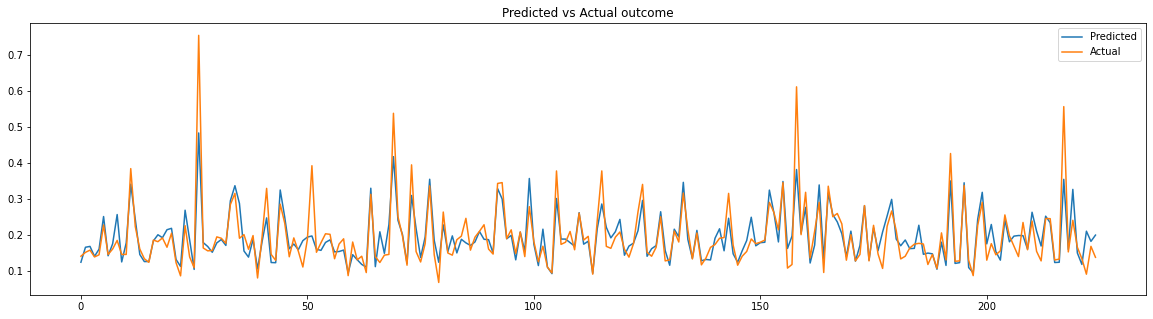

In [351]:
plt.figure(figsize=(20,5))
print("error: ", mean_squared_error(y_pred, Y_test)*100)
print("error: ", mean_absolute_error(y_pred, Y_test))
plt.plot(y_pred)
plt.plot(Y_test)
plt.title("Predicted vs Actual outcome")
plt.legend(["Predicted", "Actual"])

In [346]:
y_pred.reshape(-1).shape, Y_test.shape

((10,), (225,))

### GradientBoostingRegressor

In [353]:
from sklearn.ensemble import GradientBoostingRegressor

In [355]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.8467749878897649

error:  0.12085348520802083
error:  0.0210440018730296


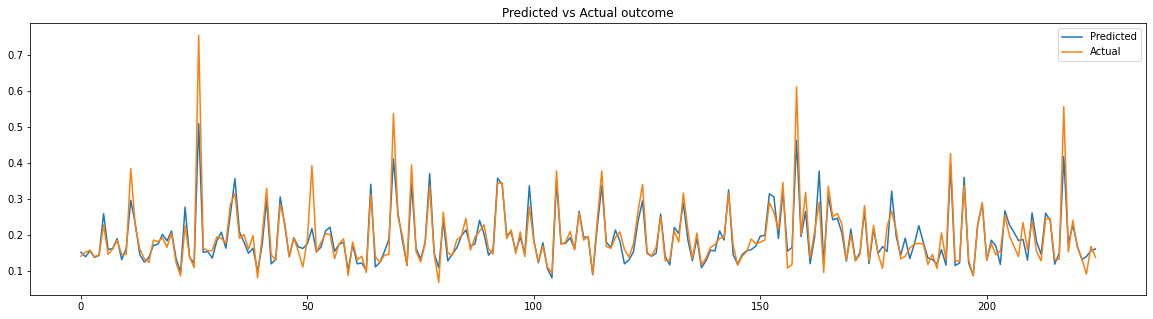

In [357]:
y_pred = reg.predict(X_test)
plt.figure(figsize=(20,5))
print("error: ", mean_squared_error(y_pred, Y_test)*100)
print("error: ", mean_absolute_error(y_pred, Y_test))
plt.plot(y_pred)
plt.plot(Y_test)
plt.title("Predicted vs Actual outcome")
plt.legend(["Predicted", "Actual"])